# US data EDA

# Step 1: Setup environment
- Import all required Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Import US data

In [60]:
usdata=pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/Contries_Data/Usa_history_data.csv")
df_temp=usdata
usdata.head(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,United States,01/01/1970,35.0,28.1,32.0,20.9,NaN,0.00,NaN,13.9,NaN,12.8,77.9,61.54,Overcast
1,United States,01/02/1970,41.1,25.1,33.2,18.1,NaN,0.00,NaN,17.2,NaN,10.0,37.5,59.52,Partially cloudy
2,United States,01/03/1970,38.0,26.9,33.6,15.5,NaN,0.05,NaN,17.2,NaN,10.5,73.3,67.34,"Rain, Partially cloudy"
3,United States,01/04/1970,33.2,21.8,27.0,10.9,NaN,0.00,NaN,17.2,NaN,9.5,0.0,51.89,Clear
4,United States,01/05/1970,44.0,20.0,30.2,11.1,NaN,0.00,NaN,15.0,NaN,9.3,47.1,65.60,Partially cloudy


### Let's change column names and datatype of date feature

In [12]:
usdata.rename(columns = {'Date time':'time','Maximum Temperature':'maxTemp','Minimum Temperature':'minTemp',
                         'Temperature':'temp','Wind Chill':'windChill','Heat Index':'heatIndex',
                          'Snow Depth':'snowDepth','Wind Speed':'windSpeed','Wind Gust':'windGust',
                          'Cloud Cover':'cloudCover','Relative Humidity':'relHumidity'
                         }, inplace=True)
usdata["time"]=pd.to_datetime(usdata.time)
usdata.head()

,Name,time,maxTemp,minTemp,temp,windChill,heatIndex,Precipitation,snowDepth,windSpeed,windGust,Visibility,cloudCover,relHumidity,Conditions
0,United States,1970-01-01,35.0,28.1,32.0,20.9,NaN,0.00,NaN,13.9,NaN,12.8,77.9,61.54,Overcast
1,United States,1970-01-02,41.1,25.1,33.2,18.1,NaN,0.00,NaN,17.2,NaN,10.0,37.5,59.52,Partially cloudy
2,United States,1970-01-03,38.0,26.9,33.6,15.5,NaN,0.05,NaN,17.2,NaN,10.5,73.3,67.34,"Rain, Partially cloudy"
3,United States,1970-01-04,33.2,21.8,27.0,10.9,NaN,0.00,NaN,17.2,NaN,9.5,0.0,51.89,Clear
4,United States,1970-01-05,44.0,20.0,30.2,11.1,NaN,0.00,NaN,15.0,NaN,9.3,47.1,65.60,Partially cloudy


### Now let us check feature names

In [9]:
usdata.columns

Index(['Name', 'time', 'maxTemp', 'minTemp', 'temp', 'windChill', 'heatIndex',
       'Precipitation', 'snowDepth', 'windSpeed', 'windGust', 'Visibility',
       'cloudCover', 'relHumidity', 'Conditions'],
      dtype='object')

### Let us see how many samples we have here

In [13]:
usdata.shape

(18545, 15)

- 18545 samples is good for modelling
### Let us make sure we have all datatypes correct for all features

In [14]:
usdata.dtypes

Name                     object
time             datetime64[ns]
maxTemp                 float64
minTemp                 float64
temp                    float64
windChill               float64
heatIndex               float64
Precipitation           float64
snowDepth               float64
windSpeed               float64
windGust                float64
Visibility              float64
cloudCover              float64
relHumidity             float64
Conditions               object
dtype: object

### Let us check for missing data

In [15]:
usdata.isnull().sum()

Name                 0
time                 0
maxTemp              0
minTemp              0
temp                 0
windChill         9784
heatIndex        13239
Precipitation        0
snowDepth        16653
windSpeed            0
windGust         16022
Visibility           0
cloudCover           0
relHumidity          0
Conditions           0
dtype: int64

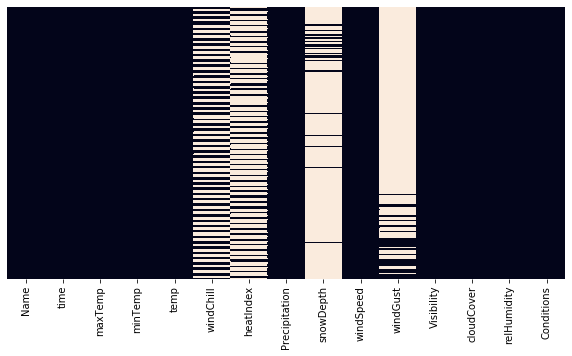

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(usdata.isnull(),yticklabels=False,cbar=False)

### Now we remove these features with incomplete data

In [23]:
usdata.drop(columns=['snowDepth','heatIndex','windGust','windChill'],inplace=True)

In [24]:
usdata.head()

,Name,time,maxTemp,minTemp,temp,Precipitation,windSpeed,Visibility,cloudCover,relHumidity,Conditions
0,United States,1970-01-01,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,Overcast
1,United States,1970-01-02,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,Partially cloudy
2,United States,1970-01-03,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,"Rain, Partially cloudy"
3,United States,1970-01-04,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,Clear
4,United States,1970-01-05,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,Partially cloudy


In [30]:
usdata.describe

<bound method NDFrame.describe of                 Name       time  maxTemp  minTemp  temp  Precipitation  \
0      United States 1970-01-01     35.0     28.1  32.0           0.00   
1      United States 1970-01-02     41.1     25.1  33.2           0.00   
2      United States 1970-01-03     38.0     26.9  33.6           0.05   
3      United States 1970-01-04     33.2     21.8  27.0           0.00   
4      United States 1970-01-05     44.0     20.0  30.2           0.00   
...              ...        ...      ...      ...   ...            ...   
18540  United States 2020-10-28     69.7     61.6  65.3           0.00   
18541  United States 2020-10-29     63.5     52.9  58.3           2.25   
18542  United States 2020-10-30     53.8     48.6  50.9           0.31   
18543  United States 2020-10-31     49.6     40.5  46.6           0.00   
18544  United States 2020-11-01     58.6     41.9  51.5           0.51   

       windSpeed  Visibility  cloudCover  relHumidity              Conditions

### lets check for data distribution of temperature feature

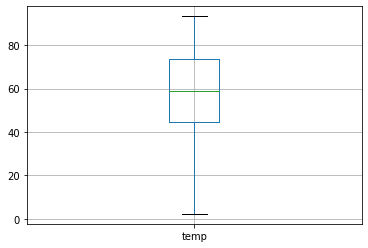

In [33]:
usdata.boxplot(column=['temp'])

### lets check for data distribution of Precipitation feature

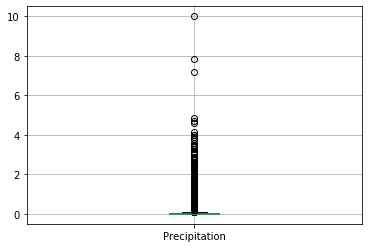

In [34]:
usdata.boxplot(column=['Precipitation'])

(array([  10.,  118.,  630., 1942., 3039., 2823., 2768., 3176., 3595.,
         444.]),
 array([ 2.2 , 11.32, 20.44, 29.56, 38.68, 47.8 , 56.92, 66.04, 75.16,
        84.28, 93.4 ]),
 <a list of 10 Patch objects>)

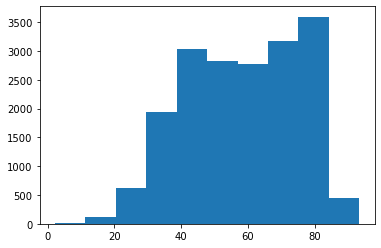

In [42]:
plt.hist(usdata['temp'])

(array([ 997., 1768., 1591., 1347., 1446., 1656., 1861., 1996., 1977.,
        3906.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

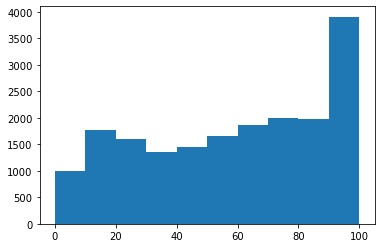

In [43]:
plt.hist(usdata['cloudCover'])

### Let us check how many samples we have for each for every condition

In [52]:
usdata['Conditions'].value_counts()

Partially cloudy          6386
Rain, Overcast            3638
Clear                     3080
Overcast                  2903
Rain, Partially cloudy    1351
Rain                       498
Snow, Partially cloudy     287
Snow, Overcast             270
Snow                       132
Name: Conditions, dtype: int64

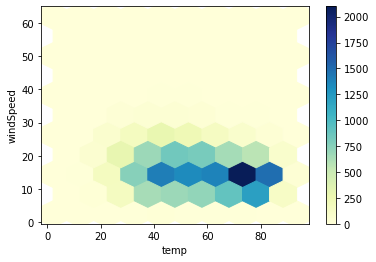

In [54]:
usdata.plot.hexbin(x='temp',y='windSpeed',gridsize=9,cmap='YlGnBu',sharex=False)
plt.show()

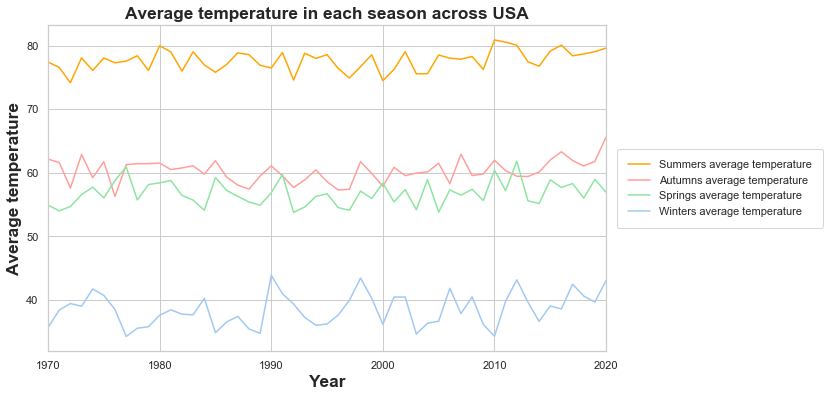

In [61]:
# Extract year from each reading
df_temp=usdata
df_temp ['Year'] = pd.DatetimeIndex (df_temp ['Date time']).year
df_temp ['Month'] = pd.DatetimeIndex (df_temp ['Date time']).month
df_temp.tail ()

#function for getting season based on month
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    
min_year = df_temp['Year'].min()
max_year = df_temp['Year'].max()
years = range(min_year, max_year + 1)
    
df_temp['Season'] = df_temp['Month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    years_data = df_temp[df_temp['Year'] == year]
    spring_temps.append(years_data[years_data['Season'] == 'Spring']['Temperature'].mean())
    summer_temps.append(years_data[years_data['Season'] == 'Summer']['Temperature'].mean())
    autumn_temps.append(years_data[years_data['Season'] == 'Autumn']['Temperature'].mean())
    winter_temps.append(years_data[years_data['Season'] == 'Winter']['Temperature'].mean())
    
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature',fontsize = 'x-large', fontweight = 'bold')
ax.set_xlabel('Year',fontsize = 'x-large', fontweight = 'bold')
ax.set_title('Average temperature in each season across USA',fontsize = 'x-large', fontweight = 'bold')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)